In [59]:
#importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pickle

In [35]:
#importing data
crop_data = pd.read_csv('Crop_recommendation.csv')
crop_data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [24]:
#Rows and Columns
crop_data.shape

(2200, 8)

In [25]:
#Information about Each Column
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
#Checking for null values presence
crop_data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
#Statistical Analysis
crop_data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
#Checking for duplicate values presence
crop_data.duplicated().sum()

0

In [8]:
#Checking Correlation between features
numeric_columns = crop_data.select_dtypes(include=['number'])
corr_matrix = numeric_columns.corr()
corr_matrix

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

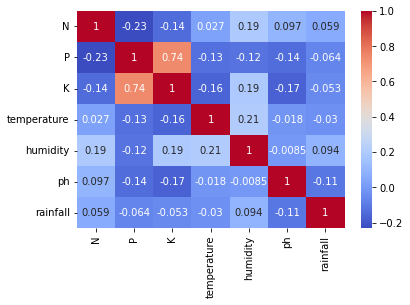

In [9]:
sns.heatmap(corr_matrix, annot = True, cbar = True, cmap = 'coolwarm')

In [10]:
#Encoding data
crop_data['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [26]:
crop_data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [36]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}

In [37]:
crop_data['label_encoded'] = crop_data['label'].map(crop_dict)

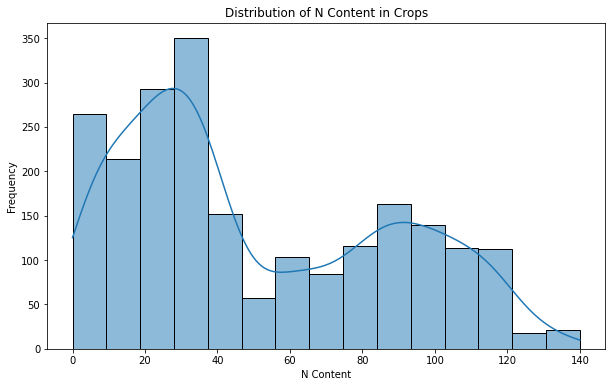

In [39]:
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.histplot(data=crop_data, x='N', kde=True)  # Plot the distribution with KDE


plt.title("Distribution of N Content in Crops")
plt.xlabel("N Content")
plt.ylabel("Frequency")


plt.show()

In [38]:
crop_data.head()

,N,P,K,temperature,humidity,ph,rainfall,label,label_encoded
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


In [40]:
crop_data.drop('label', axis = 1, inplace = True)
crop_data.head()

,N,P,K,temperature,humidity,ph,rainfall,label_encoded
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [41]:
#Splitting Features and Label
X = crop_data.drop('label_encoded', axis = 1)
y = crop_data['label_encoded']

print(X.head())
print(y.head())

    N   P   K  temperature   humidity        ph    rainfall
0  90  42  43    20.879744  82.002744  6.502985  202.935536
1  85  58  41    21.770462  80.319644  7.038096  226.655537
2  60  55  44    23.004459  82.320763  7.840207  263.964248
3  74  35  40    26.491096  80.158363  6.980401  242.864034
4  78  42  42    20.130175  81.604873  7.628473  262.717340
0    1
1    1
2    1
3    1
4    1
Name: label_encoded, dtype: int64


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [17]:
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print the scaled data
print("Scaled X_train:\n", X_train_scaled)
print("Scaled X_test:\n", X_test_scaled)

Scaled X_train:
 [[0.80714286 0.23571429 0.1        ... 0.76071051 0.60393611 0.25238444]
 [0.2        0.21428571 0.085      ... 0.84542489 0.56790336 0.14256792]
 [0.07857143 0.4        0.08       ... 0.10209972 0.31527862 0.41384053]
 ...
 [0.16428571 0.24285714 0.085      ... 0.7899586  0.52253655 0.07841231]
 [0.83571429 0.54285714 0.24       ... 0.74592957 0.31147497 0.28007559]
 [0.27857143 0.13571429 0.045      ... 0.89407786 0.57298809 0.30863709]]
Scaled X_test:
 [[0.59285714 0.11428571 0.115      ... 0.5392594  0.61616483 0.61114405]
 [0.00714286 0.15714286 0.155      ... 0.92253391 0.3390557  0.30475516]
 [0.16428571 0.         0.195      ... 0.9332759  0.56890511 0.31401068]
 ...
 [0.04285714 0.42142857 0.09       ... 0.61990663 0.55370519 0.05742653]
 [0.26428571 0.36428571 0.1        ... 0.06219345 0.35301452 0.38288597]
 [0.63571429 0.34285714 0.195      ... 0.67255606 0.59327875 0.4674443 ]]


In [42]:
# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [44]:
#Initializing Models
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
k_neighbors = KNeighborsClassifier()
svc = SVC()
naive_bayes = GaussianNB()
bagging = BaggingClassifier()
gradient_boosting = GradientBoostingClassifier()

In [45]:
model_list = [
    ('Logistic Regression', logistic_regression),
    ('Decision Tree', decision_tree),
    ('Random Forest', random_forest),
    ('K-Neighbors', k_neighbors),
    ('SVC', svc),
    ('Naive Bayes', naive_bayes),
    ('Bagging', bagging),
    ('Gradient Boosting', gradient_boosting)
]

In [46]:

from sklearn.metrics import accuracy_score

# List of initialized model instances
model_instances = [logistic_regression, decision_tree, random_forest, k_neighbors, svc, naive_bayes, bagging, gradient_boosting]

# List of model names for printing
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Neighbors', 'SVC', 'Naive Bayes', 'Bagging', 'Gradient Boosting']

# Loop through each model instance, fit it, and evaluate accuracy on the training data
for model_name, model_instance in zip(model_names, model_instances):
    model_instance.fit(X_train, y_train)  # Fit the model
    y_pred_train = model_instance.predict(X_train)  # Predict on training data
    accuracy = accuracy_score(y_train, y_pred_train)  # Calculate accuracy
    print(f'{model_name} Accuracy on Training Data: {accuracy:.2f}')


C:\Users\Jayanth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy on Training Data: 0.97
Decision Tree Accuracy on Training Data: 1.00
Random Forest Accuracy on Training Data: 1.00
K-Neighbors Accuracy on Training Data: 0.99
SVC Accuracy on Training Data: 0.98
Naive Bayes Accuracy on Training Data: 1.00
Bagging Accuracy on Training Data: 1.00
Gradient Boosting Accuracy on Training Data: 1.00


In [47]:
random_forest = RandomForestClassifier()

# Fit the model to the training data
random_forest.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest.predict(X_test)

# Calculate accuracy on the test data
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9954545454545455

In [57]:
def recommendation(N, P, K, temperature, humidity, ph, rainfall):
    features = np.array([N, P, K, temperature, humidity, ph, rainfall]).reshape(1, -1)
    prediction = random_forest.predict(features)
    return prediction[0]

In [61]:
N = 20
P = 30
K = 40
temperature = 40.0
humidity = 20
ph = 30
rainfall = 50


predict = recommendation(N, P, K, temperature, humidity, ph, rainfall)

if predict in crop_dict.values():
    crop = [key for key, value in crop_dict.items() if value == predict][0]
    print("{} is the best crop to be cultivated in your farm".format(crop))
else:
    print("Sorry!!! We are unable to recommend a crop for this environment")


C:\Users\Jayanth\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


watermelon is the best crop to be cultivated in your farm


In [60]:
pickle.dump(random_forest, open('model.pkl', 'wb'))